## AML Assignment 4


### Loading the IMDB data




In [22]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences
import numpy as np

max_features = 10000  # Number of words to consider as features
maxlen = 150  # Cuts off after this number of words

# Load IMDb dataset
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

x_train = x_train[:200]
y_train = y_train[:200]
x_test = x_test[:200]
y_test = y_test[:200]

x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)


### Using an Embedding layer and classifier on the IMDB data.



Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_10 (Embedding)        │ (None, 150, 8)         │        80,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 1200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │         1,201 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 81,201 (317.19 KB)

 Trainable params: 81,201 (317.19 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - acc: 0.5109 - loss: 0.6915 - val_acc: 0.6500 - val_loss: 0.6873
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - acc: 0.6766 - loss: 0.6771 - val_acc: 0.7000 - val_loss: 0.6870
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - acc: 0.8679 - loss: 0.6667 - val_acc: 0.6250 - val_loss: 0.6862
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - acc: 0.8619 - loss: 0.6561 - val_acc: 0.6000 - val_loss: 0.6857
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - acc: 0.9405 - loss: 0.6437 - val_acc: 0.5750 - val_loss: 0.6849
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - acc: 0.9237 - loss: 0.6275 - val_acc: 0.5750 - val_loss: 0.6848
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - acc: 0.9565 - loss: 0.6200 - val_acc: 0.5500 - val_loss: 0.6837
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - acc: 0.9590 - loss: 0.6035 - val_acc: 0.6000 - val_loss: 0.6832
Epoch 9/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - acc: 0.9493 - loss: 0.5975 - 

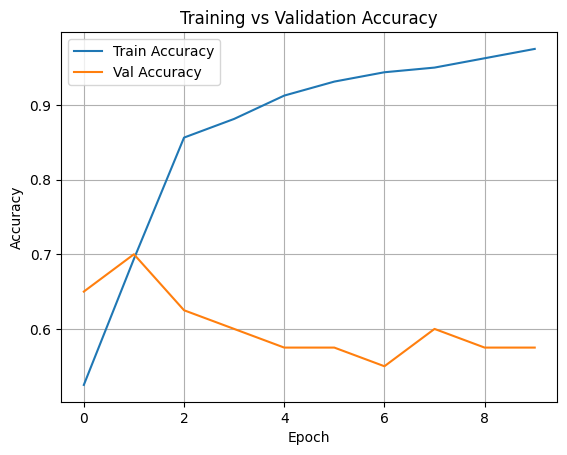

In [25]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
import numpy as np

# Set parameters
max_features = 10000
maxlen = 150

# Load IMDb dataset
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

x_train = x_train[:200]
y_train = y_train[:200]
x_test = x_test[:200]
y_test = y_test[:200]

x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

# Building the model
model = Sequential()
model.add(Embedding(input_dim=max_features, output_dim=8, input_length=maxlen))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

model.build(input_shape=(None, maxlen))
model.summary()

# Train the model
history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2
)

# Evaluate on test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")

# Plot training vs validation accuracy
plt.plot(history.history['acc'], label='Train Accuracy')
plt.plot(history.history['val_acc'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.grid(True)
plt.show()


### Number of Parameters

**Embedding** = vocabulary size i.e. input x output = 10000 x 8.12 = 81,201

*** Total params = 81,201***

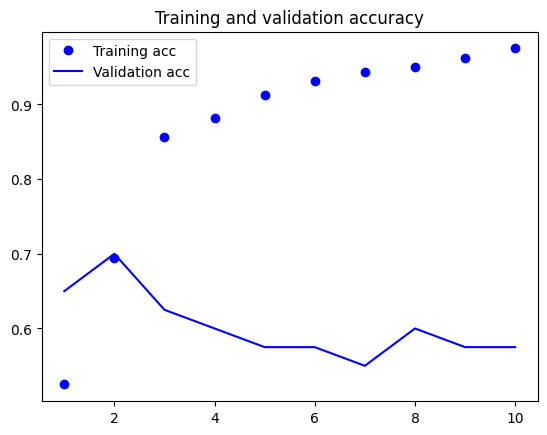

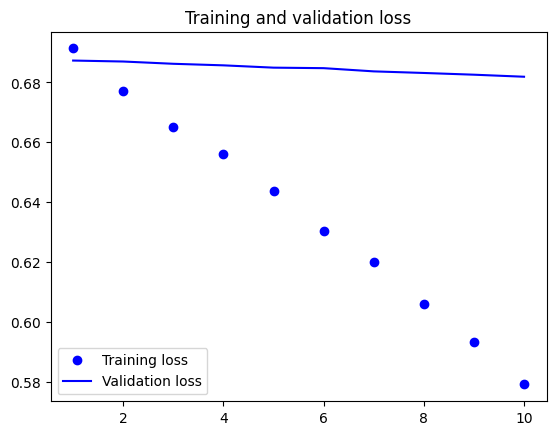

In [27]:
import matplotlib.pyplot as plt

acc = history.history["acc"] # Training accuracy
val_acc = history.history["val_acc"] # Validation accuracy
loss = history.history["loss"] # Training loss
val_loss = history.history["val_loss"] # Validation loss

epochs = range(1, len(acc) + 1) #plots every epoch, here 10

plt.plot(epochs, acc, "bo", label = "Training acc") # "bo" gives dot plot
plt.plot(epochs, val_acc, "b", label = "Validation acc") # "b" gives line plot
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, "bo", label = "Training loss")
plt.plot(epochs, val_loss, "b", label = "Validation loss")
plt.title("Training and validation loss")
plt.legend()

plt.show()

### Using Pretrained Word Embeddings


In [35]:
from zipfile import ZipFile

# specifying the zip file name
file_name = "/content/aclImdb.zip"

# opening the zip file in READ mode
with ZipFile(file_name, 'r') as zip:
    # printing all the contents of the zip file
    zip.printdir()

    # extracting all the files
    print('Extracting all the files now...')
    zip.extractall()
    print('Done!')

Streaming output truncated to the last 5000 lines.
aclImdb/train/neg/1802_2.txt                   2011-04-12 02:47:36          774
aclImdb/train/neg/1849_1.txt                   2011-04-12 02:47:36          726
aclImdb/train/neg/1726_1.txt                   2011-04-12 02:47:36         3019
aclImdb/train/neg/1801_4.txt                   2011-04-12 02:47:36         1358
aclImdb/train/neg/1739_4.txt                   2011-04-12 02:47:36         1645
aclImdb/train/neg/1794_4.txt                   2011-04-12 02:47:36          685
aclImdb/train/neg/1870_1.txt                   2011-04-12 02:47:36         1770
aclImdb/train/neg/1823_1.txt                   2011-04-12 02:47:36          637
aclImdb/train/neg/1819_2.txt                   2011-04-12 02:47:36         1668
aclImdb/train/neg/1754_3.txt                   2011-04-12 02:47:36          779
aclImdb/train/neg/1848_3.txt                   2011-04-12 02:47:36          766
aclImdb/train/neg/1807_2.txt                   2011-04-12 02:47:36   

In [36]:
import os

# Update path to the actual extracted IMDb folder
imdb_dir = "/content/aclImdb"
train_dir = os.path.join(imdb_dir, "test")

labels = []
texts = []

for label_type in ["neg", "pos"]:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname.endswith(".txt"):
            with open(os.path.join(dir_name, fname), encoding='utf-8') as f:
                texts.append(f.read())
            labels.append(0 if label_type == "neg" else 1)


In [37]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Tokenizing the data


In [40]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

# Tokenizing config
max_sequence_len = 150
training_samples = 200
validation_samples = 10000
max_words = 10000

# Tokenize
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index
print("Found %s unique tokens." % len(word_index))

# Pad the sequences correctly
data = pad_sequences(sequences, maxlen=max_sequence_len)

# Labels and shuffling
labels = np.asarray(labels)
print("Shape of data tensor:", data.shape)
print("Shape of label tensor:", labels.shape)

indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

# Train/val split
x_data_train = data[:training_samples]
y_data_train = labels[:training_samples]
validation_samples = min(validation_samples, len(data) - training_samples)
x_val = data[training_samples:training_samples + validation_samples]
y_val = labels[training_samples:training_samples + validation_samples]


Found 87393 unique tokens.
Shape of data tensor: (25000, 150)
Shape of label tensor: (25000,)


### Using the GloVe word embedding


In [41]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip

import os
import numpy as np

glove_dir = '.'  # Current directory
embeddings_index = {}

with open(os.path.join(glove_dir, "glove.6B.100d.txt"), encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

print("Loaded word vectors:", len(embeddings_index))


--2025-04-21 02:02:19--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2025-04-21 02:02:19--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2025-04-21 02:02:19--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov


#### Preparing the GloVe word embeddings matrix

In [42]:
embedding_dim = 100 # GloVe contains 100-dimensional embedding vectors for 400.000 words

embedding_matrix = np.zeros((max_words, embedding_dim)) # embedding_matrix.shape (10000, 100)
for word, i in word_index.items():
    if i < max_words:
        embedding_vector = embeddings_index.get(word) # embedding_vector.shape (100,)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector # Words not found in the mebedding index will all be zeros

#### Model Definition

Found 87393 unique tokens.
Shape of data tensor: (25000, 150)
Shape of label tensor: (25000,)


Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_13 (Embedding)        │ (None, 150, 8)         │        80,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_12 (Flatten)            │ (None, 1200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 32)             │        38,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,465 (462.75 KB)

 Trainable params: 118,465 (462.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 153ms/step - accuracy: 0.4356 - loss: 0.6944 - val_accuracy: 0.4896 - val_loss: 0.6936
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 115ms/step - accuracy: 0.8152 - loss: 0.6751 - val_accuracy: 0.4924 - val_loss: 0.6937
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 116ms/step - accuracy: 0.8460 - loss: 0.6629 - val_accuracy: 0.4962 - val_loss: 0.6938
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step - accuracy: 0.9065 - loss: 0.6433 - val_accuracy: 0.4985 - val_loss: 0.6944
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 115ms/step - accuracy: 0.8905 - loss: 0.6208 - val_accuracy: 0.4986 - val_loss: 0.6951
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 116ms/step - accuracy: 0.9191 - loss: 0.6002 - val_accuracy: 0.4985 - val_loss: 0.6965
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 112ms/step - accuracy: 0.9274 - loss: 0.5641 - val_accuracy: 0.4993 - val_loss: 0.6983
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 116ms/step - accuracy: 0.9498 - loss: 0.5333 - val_accuracy: 0.5002 - val_loss:

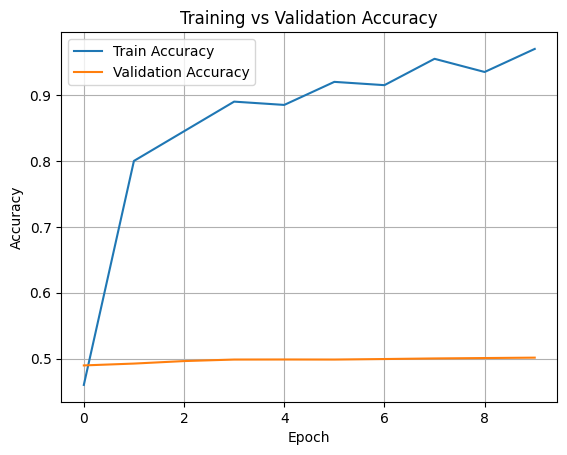

In [47]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import matplotlib.pyplot as plt

# === CONFIGURATION ===
max_sequence_len = 150      # Max number of words per review
training_samples = 200      # Number of training samples
validation_samples = 10000  # Number of validation samples
max_words = 10000           # Vocabulary size
embedding_dim = 8           # Size of word embeddings

# === TEXTS AND LABELS (Assumed Already Loaded) ===
# texts = [...]   # list of review texts
# labels = [...]  # corresponding labels (0 or 1)

# === TOKENIZATION ===
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index
print(f"Found {len(word_index)} unique tokens.")

# === PADDING ===
data = pad_sequences(sequences, maxlen=max_sequence_len)
labels = np.asarray(labels)
print("Shape of data tensor:", data.shape)
print("Shape of label tensor:", labels.shape)

# === SHUFFLE AND SPLIT ===
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_data_train = data[:training_samples]
y_data_train = labels[:training_samples]

validation_samples = min(validation_samples, len(data) - training_samples)
x_val = data[training_samples:training_samples + validation_samples]
y_val = labels[training_samples:training_samples + validation_samples]

# === MODEL ===
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_sequence_len))
model.add(Flatten())
model.add(Dropout(0.5))  # Helps reduce overfitting
model.add(Dense(32, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

# Build to show summary properly
model.build(input_shape=(None, max_sequence_len))
model.summary()

# === COMPILE & TRAIN ===
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(
    x_data_train, y_data_train,
    epochs=10,
    batch_size=32,
    validation_data=(x_val, y_val)
)

# === EVALUATION ===
loss, accuracy = model.evaluate(x_val, y_val)
print(f"\nValidation Accuracy: {accuracy:.4f}")

# === PLOT ACCURACY ===
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()



#### Loading pretrained word embedding into the Embeddig layer


#### Plotting the Results

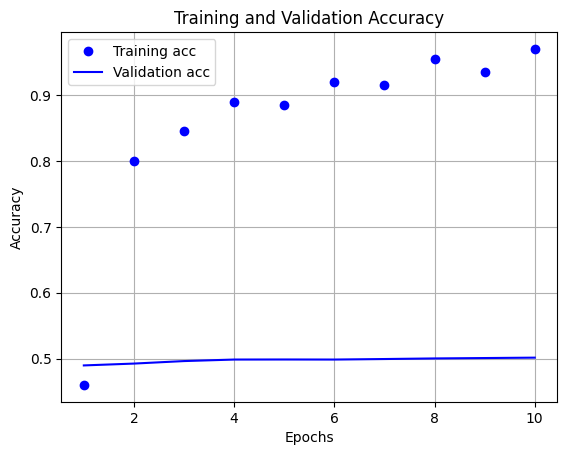

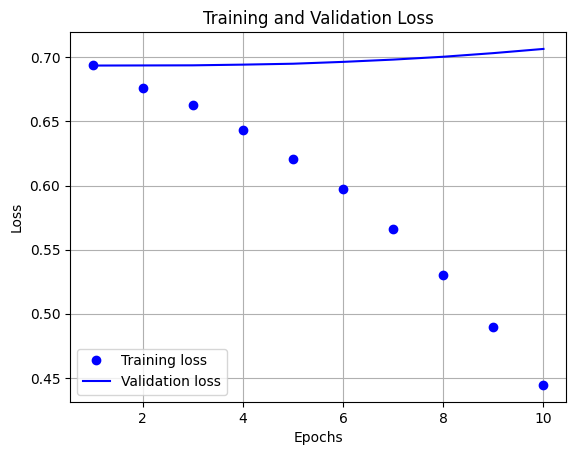

In [49]:
import matplotlib.pyplot as plt

# Access metrics safely using .get() with fallback
acc = history.history.get("accuracy", history.history.get("acc"))
val_acc = history.history.get("val_accuracy", history.history.get("val_acc"))
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(acc) + 1)

# Accuracy Plot
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.figure()

# Loss Plot
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)

plt.show()


### A concrete LSTM example
#### Preparing the IMDB data

In [52]:
from keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences  # ✅ Use TensorFlow's version

# Configuration
max_features = 10000
max_sequence_len = 150
batch_size = 32

# Load data
print("Loading data...")
(input_train, y_data_train), (input_test, y_data_test) = imdb.load_data(num_words=max_features)

# Slice down the dataset
input_train = input_train[:5000]
y_data_train = y_data_train[:5000]
input_test = input_test[:5000]
y_data_test = y_data_test[:5000]

print(len(input_train), "train sequences")
print(len(input_test), "test sequences")

# Pad sequences
print("Padding sequences (samples x time)...")
input_train = pad_sequences(input_train, maxlen=max_sequence_len)
input_test = pad_sequences(input_test, maxlen=max_sequence_len)

print("input_train shape:", input_train.shape)
print("input_test shape:", input_test.shape)


Loading data...
5000 train sequences
5000 test sequences
Padding sequences (samples x time)...
input_train shape: (5000, 150)
input_test shape: (5000, 150)


In [53]:
from keras.models import Sequential
from keras.layers import Embedding
from keras.layers import LSTM
from keras.layers import Flatten, Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "rmsprop",
             loss = "binary_crossentropy",
             metrics = ["acc"])
history = model.fit(input_train, y_data_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 149ms/step - acc: 0.5104 - loss: 0.6927 - val_acc: 0.5240 - val_loss: 0.6899
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 128ms/step - acc: 0.5511 - loss: 0.6877 - val_acc: 0.5970 - val_loss: 0.6560
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - acc: 0.6277 - loss: 0.6496 - val_acc: 0.7090 - val_loss: 0.5686
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step - acc: 0.7625 - loss: 0.5204 - val_acc: 0.7680 - val_loss: 0.5095
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 127ms/step - acc: 0.8167 - loss: 0.4277 - val_acc: 0.7690 - val_loss: 0.4912
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - acc: 0.8482 - loss: 0.3749 - val_acc: 0.7850 - val_loss: 0.4939
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - acc: 0.8566 - loss: 0.3371 - val_acc: 0.7740 - val_loss: 0.5697
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 152ms/step - acc: 0.8853 - loss: 0.2956 - val_acc: 0.7720 - val_loss: 0.4863
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 112ms/step - acc: 0

Despite the drastically smaller datasets the LSTM model performs surprisingly well!

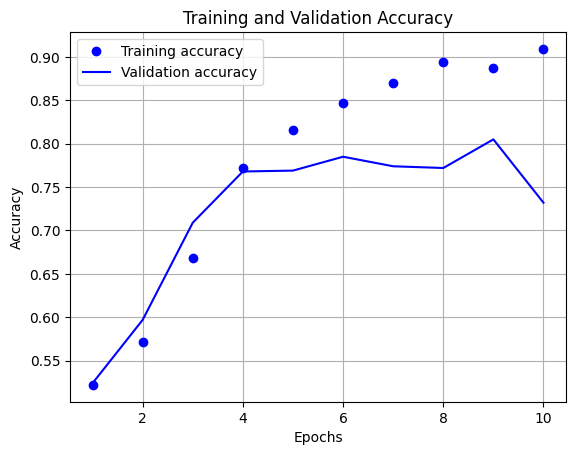

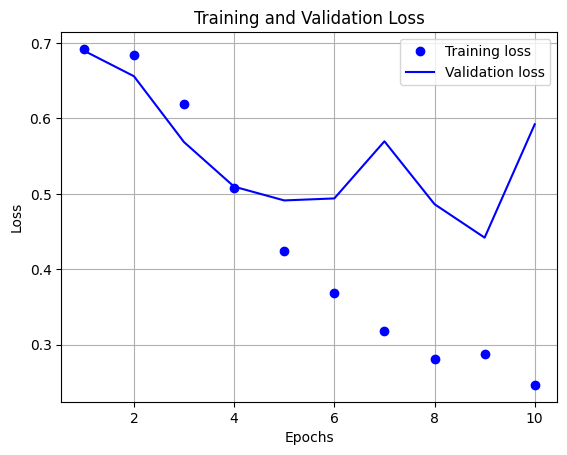

In [54]:
import matplotlib.pyplot as plt

# Get metrics with compatibility for all Keras versions
acc = history.history.get("accuracy", history.history.get("acc"))
val_acc = history.history.get("val_accuracy", history.history.get("val_acc"))
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(acc) + 1)

# Plot accuracy
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.figure()

# Plot loss
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)

plt.show()


### Summary of graphs
The training accuracy increases steadily and reaches over 90%, showing that the model is learning well. However, the validation accuracy plateaus around 77–81% and then drops, indicating the model isn't generalizing effectively. The training loss decreases consistently, but the validation loss starts increasing after epoch 6. This pattern clearly suggests the model is overfitting to the training data.